In [1]:
!sudo apt-get install megatools -q
!megadl "https://mega.nz/file/hdAFRLwQ#LKhZgRqRPgSIQab-lgQOOJL6VlXKI6jZwgxY9OQB91E"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  megatools
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 207 kB of archives.
After this operation, 898 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 megatools amd64 1.10.3-1build1 [207 kB]
Fetched 207 kB in 0s (481 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package megatools.
(Reading database ... 126284 files and directories currently ins

In [2]:
import zipfile
import os
zip_path = "/content/2_archive.zip"
extract_path = "/content/2"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Récupération des images détourées : {extract_path}")

Récupération des images détourées : /content/2


In [3]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar -q
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar -q
!tar -xf /content/images.tar
!tar -xf /content/annotation.tar

In [4]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

# Define base paths
images_base = '/content/Images'
annotations_base = '/content/Annotation'
cropped_base = '/content/Img'

# Create the main output directory if it doesn't exist
os.makedirs(cropped_base, exist_ok=True)

# Iterate over each subfolder in the Images directory
for subfolder_name in os.listdir(images_base):
    images_subfolder = os.path.join(images_base, subfolder_name)
    annotations_subfolder = os.path.join(annotations_base, subfolder_name)
    cropped_subfolder = os.path.join(cropped_base, subfolder_name)

    # Skip if it's not a directory
    if not os.path.isdir(images_subfolder):
        continue

    # Create corresponding output subfolder
    os.makedirs(cropped_subfolder, exist_ok=True)

    # Process each image in the current subfolder
    for image_file in os.listdir(images_subfolder):
        if not image_file.lower().endswith('.jpg'):
            continue

        image_path = os.path.join(images_subfolder, image_file)

        # Construct annotation file path (without extension)
        annotation_file_name = os.path.splitext(image_file)[0]  # Remove .jpg extension
        annotation_path = os.path.join(annotations_subfolder, annotation_file_name)

        # Check if annotation file exists
        if not os.path.exists(annotation_path):
            print(f"Annotation file {annotation_path} not found. Skipping {image_file}.")
            continue

        try:
            # Parse XML
            tree = ET.parse(annotation_path)
            root = tree.getroot()

            # Find the first object's bounding box
            obj = root.find('object')
            if obj is None:
                print(f"No object found in {annotation_path}. Skipping {image_file}.")
                continue

            bndbox = obj.find('bndbox')
            if bndbox is None:
                print(f"No bndbox found in {annotation_path}. Skipping {image_file}.")
                continue

            # Extract bounding box coordinates
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)

            # Open and crop image
            img = Image.open(image_path)
            cropped_img = img.crop((xmin, ymin, xmax, ymax))

            # Save cropped image
            output_path = os.path.join(cropped_subfolder, image_file)
            cropped_img.save(output_path)
            print(f"Cropped {image_file} → {output_path}")

        except Exception as e:
            print(f"Error processing {image_file}: {str(e)}")

print("Cropping complete!")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Cropped n02105162_10488.jpg → /content/Img/n02105162-malinois/n02105162_10488.jpg
Cropped n02105162_6489.jpg → /content/Img/n02105162-malinois/n02105162_6489.jpg
Cropped n02105162_2079.jpg → /content/Img/n02105162-malinois/n02105162_2079.jpg
Cropped n02105162_6288.jpg → /content/Img/n02105162-malinois/n02105162_6288.jpg
Cropped n02105162_5924.jpg → /content/Img/n02105162-malinois/n02105162_5924.jpg
Cropped n02105162_5548.jpg → /content/Img/n02105162-malinois/n02105162_5548.jpg
Cropped n02105162_5462.jpg → /content/Img/n02105162-malinois/n02105162_5462.jpg
Cropped n02105162_5370.jpg → /content/Img/n02105162-malinois/n02105162_5370.jpg
Cropped n02105162_175.jpg → /content/Img/n02105162-malinois/n02105162_175.jpg
Cropped n02105162_6501.jpg → /content/Img/n02105162-malinois/n02105162_6501.jpg
Cropped n02105162_1378.jpg → /content/Img/n02105162-malinois/n02105162_1378.jpg
Cropped n02105162_9927.jpg → /content/Img/

In [2]:
!ls `pip show numpy | grep Location | grep -o '[^ ]*$'` | grep numpy
import numpy
print(numpy.__version__)
from torchvision import transforms

numpy
numpy-1.26.4.dist-info
numpy.libs
1.26.4


In [7]:
# Downloading all codes & dependencies
!git clone https://github.com/ZhengPeng7/BiRefNet.git
!pip uninstall -q torchaudio torchdata torchtext -y
!pip install -q -r BiRefNet/requirements.txt
!pip install -q -U gdown
# Download weights locally
!wget https://github.com/ZhengPeng7/BiRefNet/releases/download/v1/BiRefNet-general-epoch_244.pth
%cd BiRefNet

fatal: destination path 'BiRefNet' already exists and is not an empty directory.
--2025-07-25 17:36:00--  https://github.com/ZhengPeng7/BiRefNet/releases/download/v1/BiRefNet-general-epoch_244.pth
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/525717745/ba10f0ac-ac7c-413d-a416-85f4a6be3235?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-25T18%3A23%3A00Z&rscd=attachment%3B+filename%3DBiRefNet-general-epoch_244.pth&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-25T17%3A22%3A46Z&ske=2025-07-25T18%3A23%3A00Z&sks=b&skv=2018-11-09&sig=%2BD6zkn1qCngM%2FUKlhnsM%2F7%2BGulfYD6VXAKE5ucOEpDc%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQ

In [8]:
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display

from models.birefnet import BiRefNet
from utils import check_state_dict

birefnet = BiRefNet(bb_pretrained=False)
state_dict = torch.load('../BiRefNet-general-epoch_244.pth', map_location='cpu')
state_dict = check_state_dict(state_dict)
birefnet.load_state_dict(state_dict)

# Load Model
device = 'cuda'
torch.set_float32_matmul_precision(['high', 'highest'][0])

birefnet.to(device)
birefnet.eval()
print('BiRefNet is ready to use.')

# Input Data
transform_image = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

BiRefNet is ready to use.


Traitement de la nouvelle image : n02095889_662.jpg
Affichage de la première image traitée pour vérification...


/tmp/ipython-input-11-2562229197.py:60: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  mask = Image.fromarray(mask_np, mode='L')


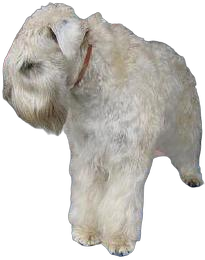


Traitement terminé. Les nouvelles images ont été sauvegardées dans /content/2


In [11]:
import os
from PIL import Image
import torch
import numpy as np
from IPython.display import display # Importation nécessaire pour l'affichage dans le notebook

# Rappel : Les variables 'birefnet', 'device', et la fonction 'transform_image' sont supposées exister car elles ont été définies dans une cellule précédente.

root_folder_path = '/content/Img'
output_path = '/content/2'

# S'assurer que le répertoire de sortie principal existe
os.makedirs(output_path, exist_ok=True)

# --- MODIFICATION : Drapeau pour n'afficher que la première image traitée ---
first_image_displayed = False

# Parcourir tous les sous-dossiers et fichiers à partir du dossier racine
for dirpath, _, filenames in os.walk(root_folder_path):
    for filename in filenames:
        # Traiter uniquement les fichiers JPG
        if filename.lower().endswith('.jpg'):

            # Construire le chemin de sortie attendu pour l'image actuelle
            relative_path = os.path.relpath(dirpath, root_folder_path)
            current_output_dir = os.path.join(output_path, relative_path)
            output_filename = f"masked_{os.path.splitext(filename)[0]}.png"
            expected_output_path = os.path.join(current_output_dir, output_filename)

            # Vérifier si ce fichier de sortie existe déjà.
            if os.path.exists(expected_output_path):
                # Si le fichier existe, on l'ignore. On n'affiche rien pour ne pas surcharger la sortie.
                continue

            # Si on arrive ici, l'image n'a pas encore été traitée.
            image_path = os.path.join(dirpath, filename)

            # Ouvrir l'image
            try:
                image = Image.open(image_path).convert('RGB')
            except Exception as e:
                print(f"Impossible d'ouvrir l'image {image_path}: {e}")
                continue # Passe à l'image suivante

            # Transformer l'image (en utilisant la fonction définie dans la cellule précédente)
            input_tensor = transform_image(image).unsqueeze(0)

            # Déplacer le tenseur sur le GPU (en utilisant la variable 'device' de la cellule précédente)
            input_tensor = input_tensor.to(device)

            # Prédiction avec le modèle BiRefNet déjà chargé
            with torch.no_grad():
                preds = birefnet(input_tensor)[-1].sigmoid().cpu()
            pred = preds[0].squeeze()

            # Convertir la prédiction en tableau numpy et mettre à l'échelle de 0 à 255
            mask_np = (pred.numpy() * 255).astype(np.uint8)

            # Créer une image PIL à partir du tableau numpy
            mask = Image.fromarray(mask_np, mode='L')

            # Redimensionner le masque pour correspondre à la taille de l'image originale
            mask = mask.resize(image.size, Image.LANCZOS)

            # Créer une nouvelle image avec un canal alpha (transparence)
            image_masked = Image.new('RGBA', image.size, (0, 0, 0, 0))

            # Coller l'image originale en utilisant le masque
            image_masked.paste(image, (0, 0), mask)

            # Créer le dossier de sortie correspondant s'il n'existe pas
            os.makedirs(current_output_dir, exist_ok=True)

            # Sauvegarder l'image masquée au format PNG
            image_masked.save(expected_output_path, 'PNG')

            # --- MODIFICATION : Affichage de la première image traitée ---
            if not first_image_displayed:
                print(f"Traitement de la nouvelle image : {filename}")
                print("Affichage de la première image traitée pour vérification...")
                display(image_masked)
                first_image_displayed = True # Mettre le drapeau à True pour ne plus afficher

# Message final pour indiquer que tout le processus est terminé.
if not first_image_displayed:
    print("Aucune nouvelle image à traiter. Tous les fichiers existaient déjà.")
else:
    print(f"\nTraitement terminé. Les nouvelles images ont été sauvegardées dans {output_path}")

In [14]:
#@title Compression des images de chien

import shutil
from google.colab import files

# 1. Créer une archive ZIP du dossier "/content/2"
shutil.make_archive('/content/dog', 'zip', '/content/2')

# 2. Télécharger le fichier ZIP
files.download('/content/dog.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>